In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


<Axes: >

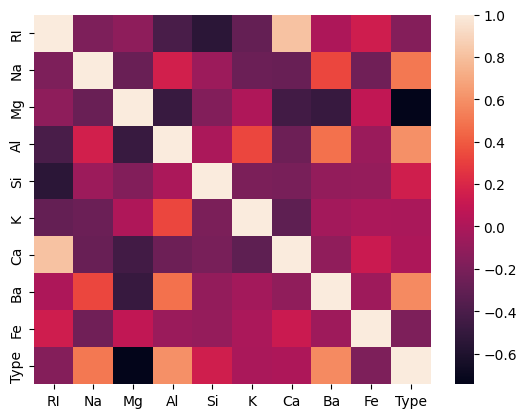

In [3]:
# correlation matrix 
cor = data.corr()
sns.heatmap(cor)

<Axes: xlabel='RI', ylabel='Na'>

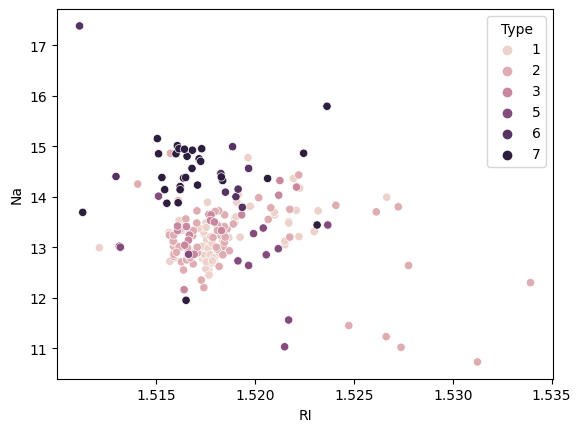

In [4]:
sns.scatterplot(x=data['RI'],y=data['Na'],hue=data['Type'])

In [5]:
scaler = StandardScaler()
scaler.fit(data.drop('Type',axis=1))

StandardScaler()

In [6]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler()

In [7]:
scaled_features = scaler.transform(data.drop('Type',axis=1))
scaled_features

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [8]:
data_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
data_feat.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [9]:
dff = data_feat.drop(['Ca','K'],axis=1) #Removing features - Ca and K 
X_train,X_test,y_train,y_test  = train_test_split(dff,data['Type'],test_size=0.3,random_state=42) 

knn = KNeighborsClassifier(n_neighbors=9,metric='manhattan')

In [10]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [11]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=4,
                     weights='uniform')

KNeighborsClassifier(metric='manhattan', n_neighbors=9, p=4)

In [12]:
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.63      0.89      0.74        19
           2       0.65      0.65      0.65        23
           3       0.00      0.00      0.00         4
           5       1.00      0.17      0.29         6
           6       0.75      1.00      0.86         3
           7       0.90      0.90      0.90        10

    accuracy                           0.69        65
   macro avg       0.66      0.60      0.57        65
weighted avg       0.68      0.69      0.65        65



C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [13]:
accuracy_score(y_test,y_pred)

0.6923076923076923

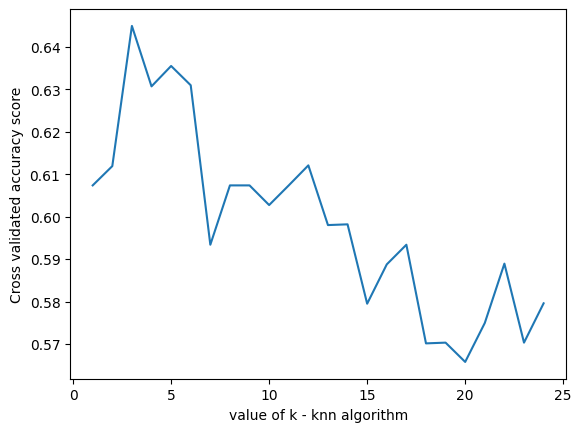

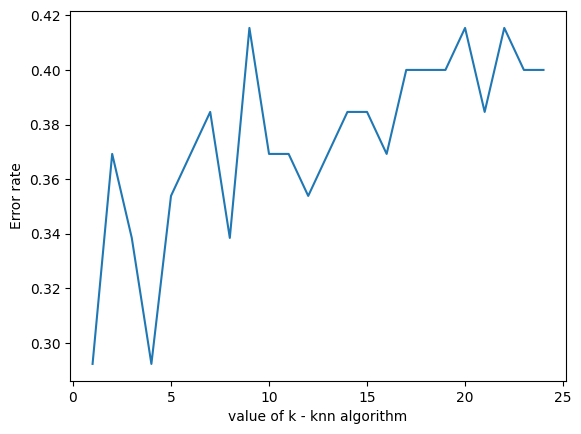

In [14]:
k_range = range(1,25)
k_scores = []
error_rate =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #kscores - accuracy
    scores = cross_val_score(knn,dff,data['Type'],cv=4,scoring='accuracy')
    k_scores.append(scores.mean())
    
    #error rate
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))

#plot k vs accuracy
plt.plot(k_range,k_scores)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Cross validated accuracy score')
plt.show()

#plot k vs error rate
plt.plot(k_range,error_rate)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Error rate')
plt.show()

From Bracket [9] use cosine too

In [15]:
dff = data_feat.drop(['Ca','K'],axis=1) #Removing features - Ca and K 
X_train,X_test,y_train,y_test  = train_test_split(dff,data['Type'],test_size=0.3,random_state=42) 

knn = KNeighborsClassifier(n_neighbors=9,metric='minkowski')

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [17]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=4,
                     weights='uniform')

KNeighborsClassifier(n_neighbors=9, p=4)

In [18]:
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.56      0.79      0.65        19
           2       0.58      0.61      0.60        23
           3       0.00      0.00      0.00         4
           5       1.00      0.17      0.29         6
           6       0.00      0.00      0.00         3
           7       0.73      0.80      0.76        10

    accuracy                           0.58        65
   macro avg       0.48      0.39      0.38        65
weighted avg       0.57      0.58      0.55        65



C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [19]:
accuracy_score(y_test,y_pred)

0.5846153846153846

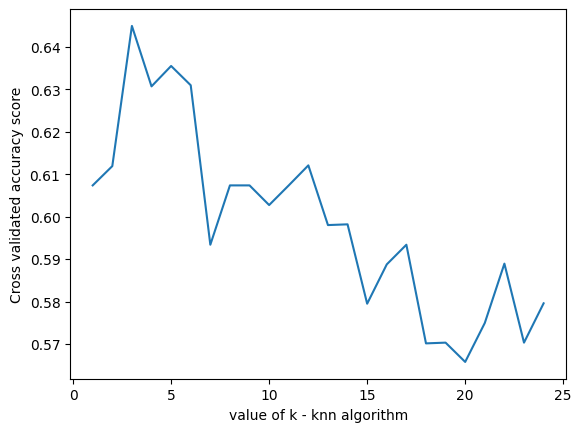

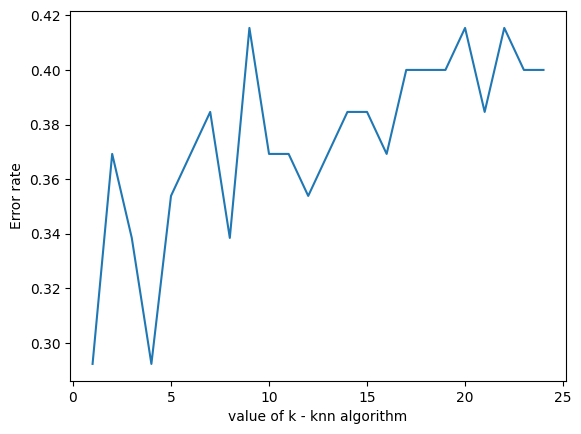

In [20]:
k_range = range(1,25)
k_scores = []
error_rate =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #kscores - accuracy
    scores = cross_val_score(knn,dff,data['Type'],cv=4,scoring='accuracy')
    k_scores.append(scores.mean())
    
    #error rate
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))

#plot k vs accuracy
plt.plot(k_range,k_scores)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Cross validated accuracy score')
plt.show()

#plot k vs error rate
plt.plot(k_range,error_rate)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Error rate')
plt.show()

In [23]:
dff = data_feat.drop(['Ca','K'],axis=1) #Removing features - Ca and K 
X_train,X_test,y_train,y_test  = train_test_split(dff,data['Type'],test_size=0.3,random_state=42) 

knn = KNeighborsClassifier(n_neighbors=9,metric='manhattan')

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [25]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean_distance',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=4,
                     weights='uniform')

KNeighborsClassifier(metric='euclidean_distance', n_neighbors=9, p=4)

In [26]:
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.63      0.89      0.74        19
           2       0.65      0.65      0.65        23
           3       0.00      0.00      0.00         4
           5       1.00      0.17      0.29         6
           6       0.75      1.00      0.86         3
           7       0.90      0.90      0.90        10

    accuracy                           0.69        65
   macro avg       0.66      0.60      0.57        65
weighted avg       0.68      0.69      0.65        65



C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [27]:
accuracy_score(y_test,y_pred)

0.6923076923076923

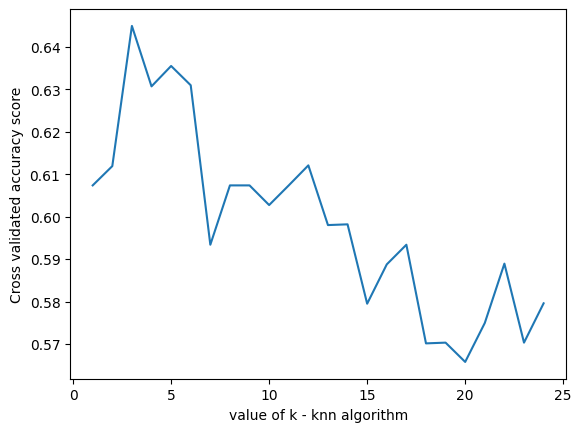

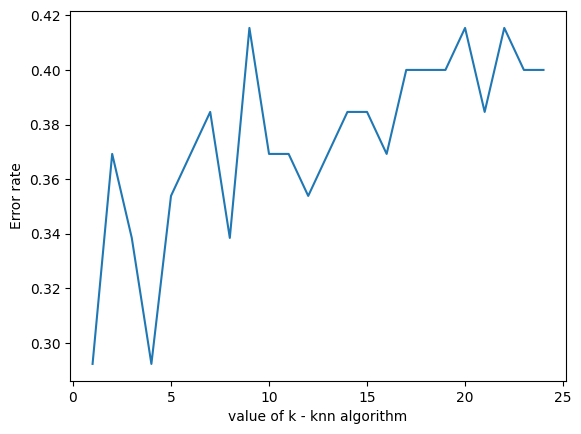

In [28]:
k_range = range(1,25)
k_scores = []
error_rate =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #kscores - accuracy
    scores = cross_val_score(knn,dff,data['Type'],cv=4,scoring='accuracy')
    k_scores.append(scores.mean())
    
    #error rate
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))

#plot k vs accuracy
plt.plot(k_range,k_scores)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Cross validated accuracy score')
plt.show()

#plot k vs error rate
plt.plot(k_range,error_rate)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Error rate')
plt.show()